In [5]:
import pymc3 as pm
import numpy as np
from scipy.stats import bernoulli

In [14]:
np.random.seed(123)
n_experiments = 4
theta_real = 0.35
data = bernoulli.rvs(p=theta_real, size=n_experiments)
print(data)

[1 0 0 0]


In [8]:
with pm.Model() as simple_model:
    theta = pm.Beta('theta', alpha=1, beta=1)
    y = pm.Bernoulli('y', p=theta, observed =data)
    
    start = pm.find_MAP()
    step = pm.Metropolis()
    trace = pm.sample(1000,step=step, start=start)

C:\ProgramData\Anaconda3\lib\site-packages\pymc3\tuning\starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  warnings.warn('find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.')
logp = -2.7726, ||grad|| = 1: 100%|█████████████| 6/6 [00:00<00:00, 384.62it/s]
Multiprocess sampling (2 chains in 2 jobs)
Metropolis: [theta]
Sampling 2 chains: 100%|███████████████| 3000/3000 [00:03<00:00, 792.92draws/s]
The number of effective samples is smaller than 25% for some parameters.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0E436CB0>,
      dtype=object)

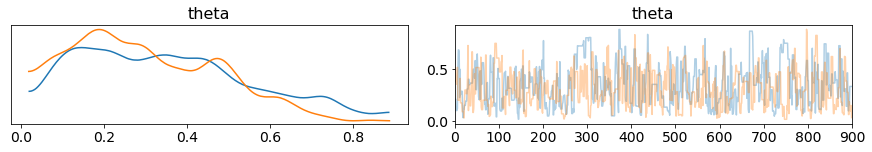

In [16]:
pm.traceplot(trace[100:],lines={'theta1':theta_real})